#### SESSION 24.1 - PLOTLY EXPRESS

**Plotly:**

- Plotly is a versatile data visualization library developed by the Canadian company Plotly. 
- It supports various languages, including Python, JavaScript, and Julia.
- Built on the plotly.js JavaScript library, Plotly empowers Python users to create captivating, interactive visualizations for Jupyter notebooks, standalone HTML files, or as components in web applications developed using Dash.

**Advantages:**

- *Multi-language Support:* Plotly is accessible across different programming languages.
  
- *Diverse Graphs:* Offers a wide variety of graph types for comprehensive data representation.
  
- *Interactive Plots:* Enables the creation of interactive and engaging plots.

- *Aesthetic Appeal:* Generates visually appealing plots.

**Note:**

- *Not Ideal for Live Data Streams:* Plotly is not designed for handling live data streams.
- For real-time data, Dash, another product from Plotly, is recommended.

**The Plotly Roadmap:**

- **Plotly Go:** A part of the Plotly ecosystem, Plotly Go likely signifies a user-friendly interface or functionality.

- **Plotly Express:** An expressive layer for creating visualizations quickly and easily.

- **Dash:** A framework for building analytical web applications, extending the capabilities of Plotly for interactive data-driven applications.


#### Installation
Plotly can be installed using pip: 
- **$ pip install plotly==5.18.0**


#### importing the ploty library
To use Plotly in your Python code, import the Plotly Express module as follows:
```python
import plotly.express as px

#### Working with plotly go

In [4]:
# import the libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.express as px

In [10]:
# importing predefine datasets using plotly express
# After 'px.data.' press 'tab' it will show the list
tips = px.data.tips()
iris = px.data.iris()
gap = px.data.gapminder()

In [11]:
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


**Scatter Plot**

In [18]:
# scatter plot using Plotly Go
# lifeEp vs gcdPerCap in 2007
temp_df = gap[gap['year'] == 2007]
temp_df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


**go.Figure()**

- In Plotly, go.Figure() is a function used to create a new figure or plot. - It's a part of Plotly's Graph Objects module (go).
- You use it to initialize a figure that can be customized and extended with various traces and layout options.

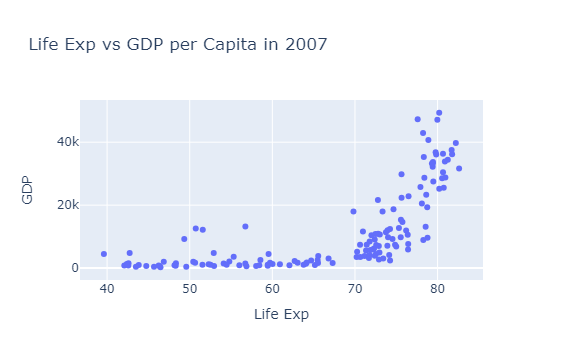

In [31]:
trace1 = go.Scatter(x=temp_df['lifeExp'],
                    y=temp_df['gdpPercap'],
                    mode='markers')
data = [trace1]
layout = go.Layout(title='Life Exp vs GDP per Capita in 2007',
                  xaxis={'title': 'Life Exp'},
                  yaxis={'title':'GDP'})
fig = go.Figure(data, layout)
fig.show()

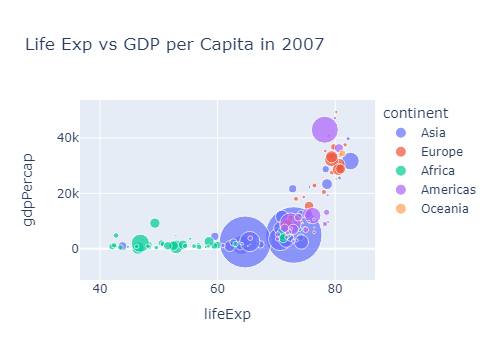

In [45]:
# scatter plot using Plotly Express -> continent as color 
#-> pop as size -> hover name -> range_x/range_y -> log_x/log_y
# lifeEp vs gcdPerCap in 2007
import plotly.express as px
px.scatter(temp_df, x='lifeExp', y='gdpPercap',
           title='Life Exp vs GDP per Capita in 2007',
          color='continent', size='pop',size_max=40,
          hover_name='country')

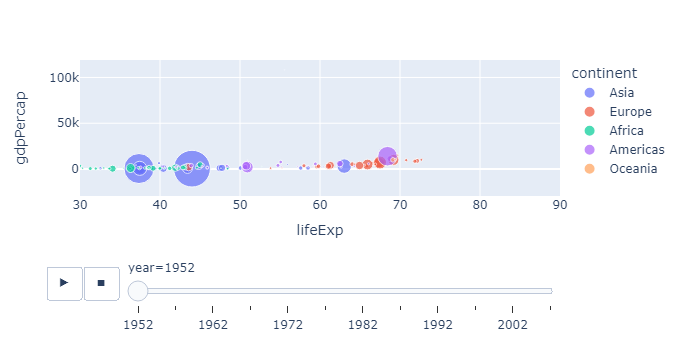

In [65]:
# plot animation of the above curve on the basic of year
px.scatter(gap, x='lifeExp', y='gdpPercap',
          range_x=(30,90), height=350,
          color='continent', size='pop',size_max=40,
          hover_name='country', animation_frame='year',
          animation_group='country')

**Line Plot**

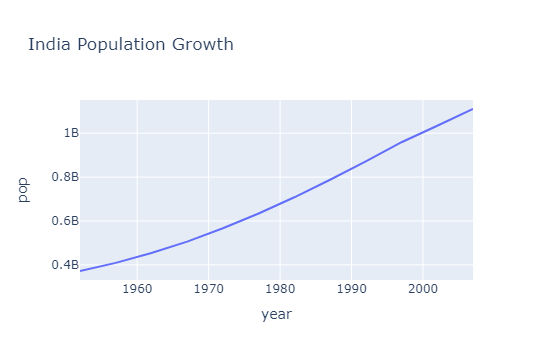

In [70]:
# line plot
# plot india pop line plot
temp_df = gap[gap['country'] == 'India']
px.line(temp_df, x='year', y='pop',title='India Population Growth')

In [77]:
# Line Plot on LifeExp of India , China, Pakistan
# Three seperate coulmn for each country
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])]
# and convert into wide format using pivot_table()
temp_df = temp_df.pivot_table(index='year',
                              columns='country',
                              values='lifeExp')
temp_df

country,China,India,Pakistan
year,,,
1952,44.00000,37.373,43.436
1957,50.54896,40.249,45.557
1962,44.50136,43.605,47.670
1967,58.38112,47.193,49.800
1972,63.11888,50.651,51.929
1977,63.96736,54.208,54.043
1982,65.52500,56.596,56.158
1987,67.27400,58.553,58.245
1992,68.69000,60.223,60.838


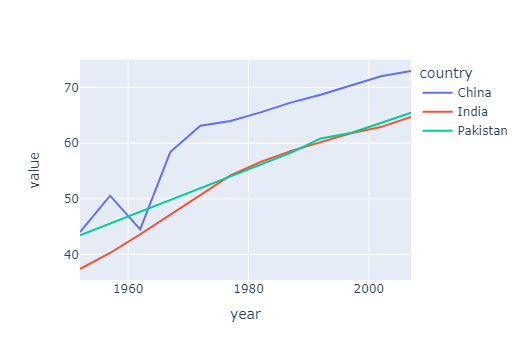

In [79]:
px.line(temp_df, x=temp_df.index, y=temp_df.columns)